# Flight Fare Prediction

### Importing Libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn                  import metrics

### Importing Data

In [172]:
data= pd.read_excel('Data_Train.xlsx')

In [173]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [175]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [176]:
#Droping missing values
data.dropna(inplace=True)

### EDA

Since, Date of Journey is of object type so changing it to Datetime format

In [177]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [178]:
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [179]:
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [180]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [181]:
# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)

##### Doing same for arrival time

In [182]:
# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [183]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [184]:
data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 25m      1
31h 30m      1
28h 30m      1
5m           1
37h 10m      1
Name: Duration, Length: 368, dtype: int64

In [185]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [186]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
data.drop(['Duration'],axis=1,inplace=True)

In [187]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [188]:
for i in data.columns[:6]:
    print(data[i].value_counts(),'\n')

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                              

In [189]:
# Since, In Additional Info columns most of the data is of no info and,
# route and total stops seems sharing same information, so dropping Additional info and Route

data.drop(['Additional_Info','Route'],axis=1,inplace=True)

##### Let's do some analysis

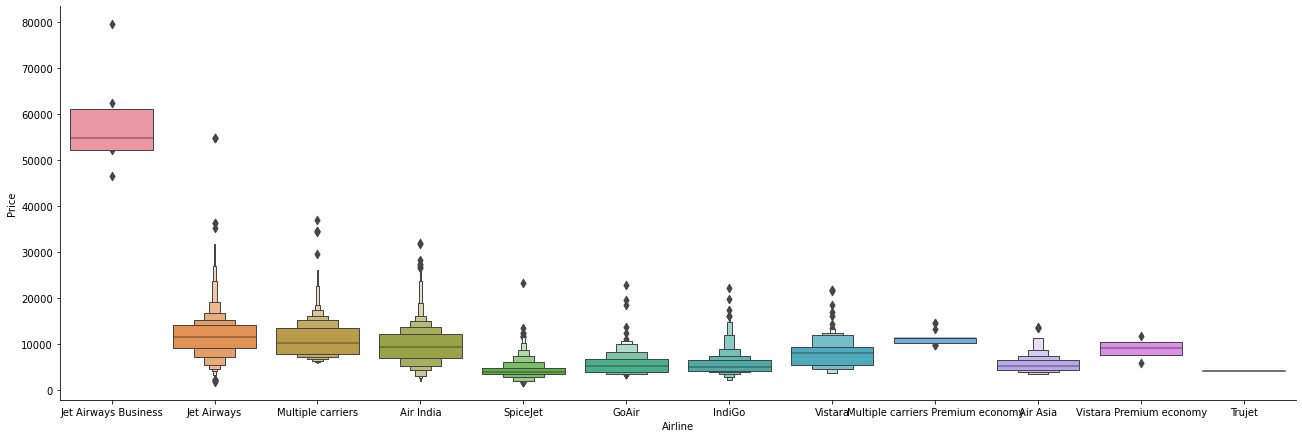

In [190]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

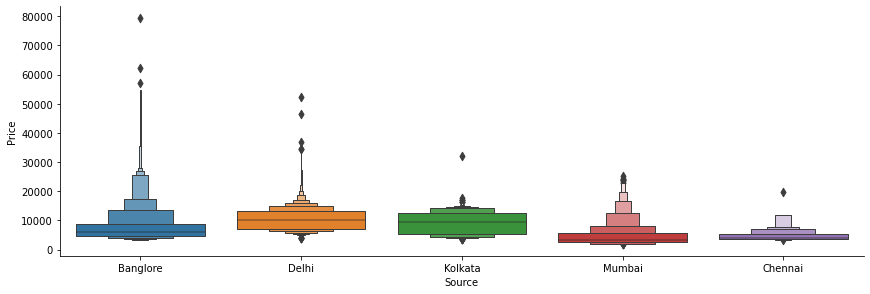

In [192]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

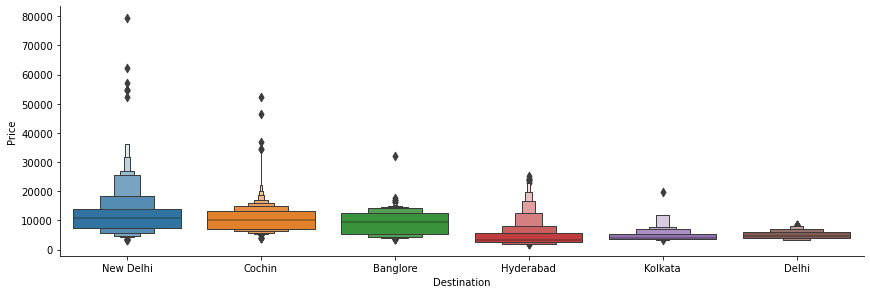

In [194]:
# Destination vs Price

sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

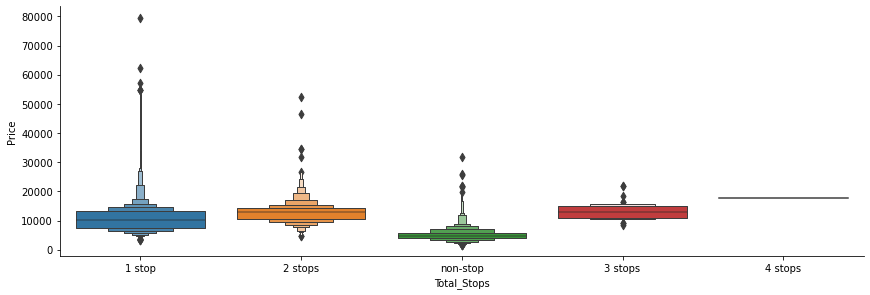

In [193]:
# Total Stops vs Price

sns.catplot(y = "Price", x = "Total_Stops", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

### Handling Categorical Data

In [140]:
# Replacing total stops data
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In Airline, Source and Destination, the data is of nominal type so using one hot encodiing

In [141]:
x= ['Airline', 'Source', 'Destination']

In [142]:
for i in x:
    data = pd.get_dummies(data, prefix=i, columns=[i])

In [143]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [144]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

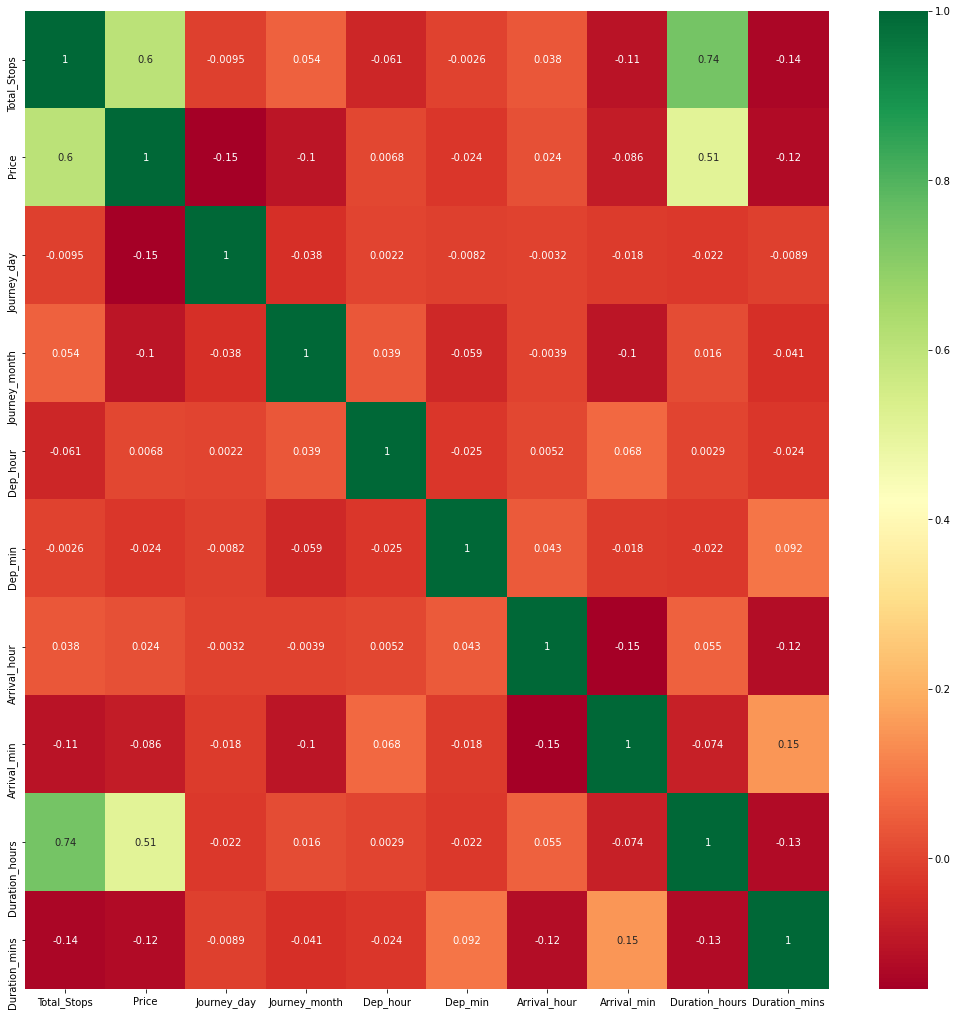

In [170]:
plt.figure(figsize = (18,18))
sns.heatmap(data.iloc[:,:10].corr(), annot = True, cmap = "RdYlGn")

### Spliting Data

In [146]:
X= data.drop(['Price'],axis=1)
Y=data['Price']

In [147]:
from sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=100)

In [148]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [149]:
Y_pred = reg_rf.predict(X_test)


In [150]:
reg_rf.score(X_train, Y_train)

0.9545739253186517

In [151]:
reg_rf.score(X_test, Y_test)

0.8175455687800656

In [152]:
y_pred = reg_rf.predict(X_test)

In [153]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 1189.0651398202508
MSE: 3820690.7604757454
RMSE: 1954.6587324839459


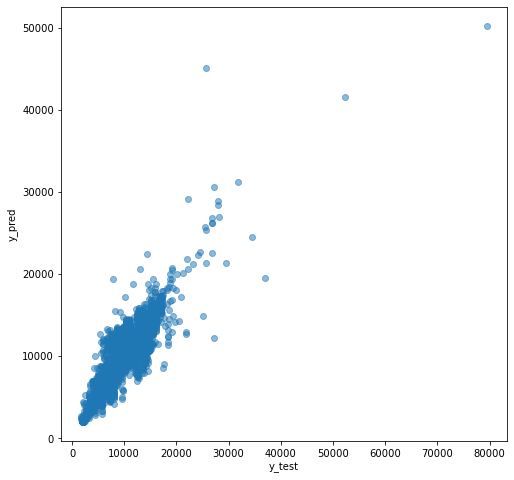

In [154]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

C:\Users\devas\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


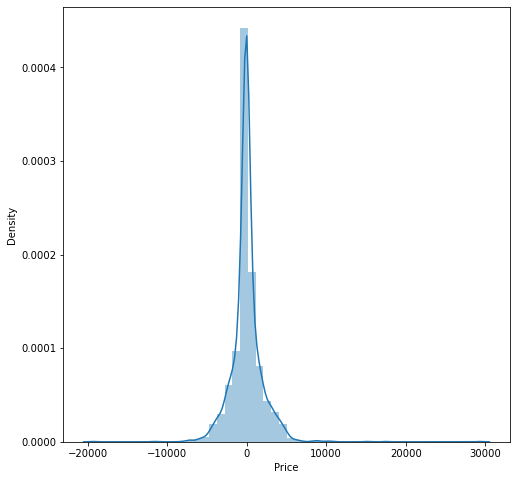

In [155]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-y_pred)
plt.show()

We can see that pedicted value and actual values are not meeting at the top so model seems to do some hyperparameter tuning
to overcome this.

### Hyperparametter tuning

In [156]:
from sklearn.model_selection  import GridSearchCV

In [157]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 900, num = 5)]
# Maximum number of levels in tree
max_depth = [5,10,15,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [158]:
grid_cv = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [159]:
rf_grid = GridSearchCV(estimator = reg_rf, param_grid = grid_cv,scoring='neg_mean_squared_error', cv = 5, verbose=2, n_jobs = 1)

In [160]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   2.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   2.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_es

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=   2.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_sp

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   7.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   7.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   7.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   8.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   7.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   1.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=1

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   7.7s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   7.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   7.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   7.6s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   7.9s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_depth=5, min_samples_leaf=5, min_samples_spli

[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=   5.9s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   7.9s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   7.6s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   7.9s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   7.7s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=   7.9s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=10, n_e

[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   6.2s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   5.9s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=   6.2s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   7.6s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   7.8s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=   7.6s
[CV] max_depth=5, min_samples_leaf=5, min_samples_sp

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   6.2s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   5.9s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   5.9s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   6.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   6.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   7.7s
[CV] max_depth=5, min_samples_leaf=10, min_samples_s

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   4.2s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   4.5s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   6.0s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   5.9s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   6.2s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=   5.9s
[CV] max_depth=5, min_samples_leaf=10, mi

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   7.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   7.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   7.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   7.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=  10.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=  10.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=300, total=   4.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   7.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   6.9s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   7.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   8.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   7.3s
[CV] max_depth=10, min_samples_leaf=1, mi

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   4.5s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   4.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=   4.4s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   7.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   7.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   7.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   4.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   4.5s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   4.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   4.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300, total=   4.6s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=500, total=   7.0s
[CV] max_depth=10, min_samples_leaf=2, mi

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   1.4s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   1.4s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   4.1s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   4.4s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   4.1s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300, total=   4.2s
[CV] max_depth=10, min_samples_leaf=5, min_samples_s

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   1.4s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   1.4s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   1.4s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100, total=   1.4s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   4.1s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   4.4s
[CV] max_depth=10, min_samples_leaf=5, mi

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=900, total=  12.2s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   1.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   1.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   1.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   1.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   1.3s
[CV] max_depth=10, min_samples_leaf=10, m

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=  12.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=900 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=  12.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=900 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=900, total=  12.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   1.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   1.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   1.3s
[CV] max_depth=10, min_samples

[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=  18.7s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=  18.7s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=  18.6s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=  18.9s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=  18.8s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   1.9s
[CV] max_depth=15, min_samples_leaf=1, min_samples_s

[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=  12.4s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=  12.8s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=  16.1s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=  16.0s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=  16.0s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=  16.0s
[CV] max_depth=15, min_samples_leaf=1, mi

[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=  13.5s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=  13.5s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=  13.4s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=700, total=  13.5s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=  17.2s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=900 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=900, total=  17.4s
[CV] max_depth=15, min_samples_leaf=2, min_samples_s

[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   9.0s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=  12.2s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=  11.9s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=  12.3s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=  12.2s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=  12.3s
[CV] max_depth=15, min_samples_leaf=2, mi

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=   8.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=   8.4s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=   8.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=  11.6s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=  11.6s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=700, total=  11.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_s

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   8.4s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   8.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   8.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   8.4s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=   8.2s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=700 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=700, total=  11.6s
[CV] max_depth=15, min_samples_leaf=5, mi

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=300, total=   4.4s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=300 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=300, total=   4.2s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   7.4s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   7.1s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   7.4s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   7.1s
[CV] max_depth=15, min_samples_leaf=10, m

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   4.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   4.5s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   4.5s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300, total=   4.2s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   7.1s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   7.4s
[CV] max_depth=15, min_samples

[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.4s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.5s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   7.2s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   7.2s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   7.0s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   6.9s
[CV] max_depth=20, min_samples_leaf=1, min_samples_s

[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   1.9s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   1.8s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   1.8s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   1.9s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=   5.7s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=   5.5s
[CV] max_depth=20, min_samples_leaf=1, mi

[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=  16.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.3s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_

[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=  18.4s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=  17.6s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=  17.9s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   1.8s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   1.8s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   1.8s
[CV] max_depth=20, min_samples_leaf=2, min_sam

[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=  15.2s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=  15.2s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=  15.3s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=  15.2s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=  15.4s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   1.6s
[CV] max_depth=20, min_samples_leaf=5, min_

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=  11.8s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=700, total=  12.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=  15.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=  14.9s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=  14.7s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900, total=  15.2s
[CV] max_depth=20, min_samples_leaf=5, min_samples_s

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=  10.9s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=  11.3s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=  11.3s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=700, total=  10.8s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=  14.2s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=900 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=900, total=  14.4s
[CV] max_depth=20, min_samples_leaf=5, mi

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   7.1s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=  10.3s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=  10.3s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=   9.9s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=  10.3s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=700, total=  10.3s
[CV] max_depth=20, min_samples_leaf=10, m

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   7.3s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   7.1s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   7.8s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=500 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=500, total=   8.3s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=  10.5s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=700 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=700, total=  10.3s
[CV] max_depth=20, min_samples

[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 191.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 300, 500, 700, 900]},
             scoring='neg_mean_squared_error', verbose=2)

In [161]:
rf_grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 900}

In [162]:
prediction = rf_grid.predict(X_test)

In [163]:
prediction

array([ 7661.48517009, 10862.69799237, 12362.47524155, ...,
        8293.39031604, 13022.24797317,  8534.71898363])

In [164]:

print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1163.3677069226592
MSE: 3378158.223256742
RMSE: 1837.976665590927


This result also seems better.

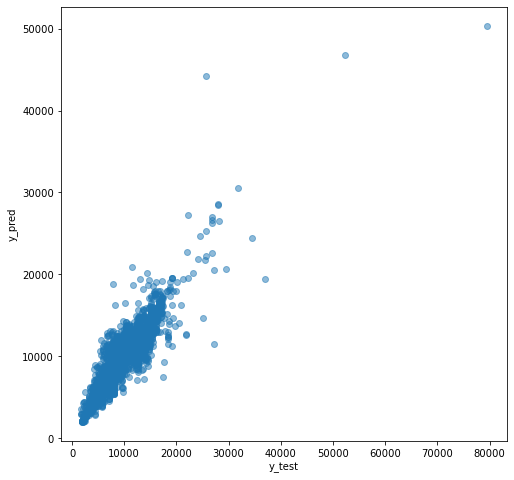

In [165]:

plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

C:\Users\devas\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


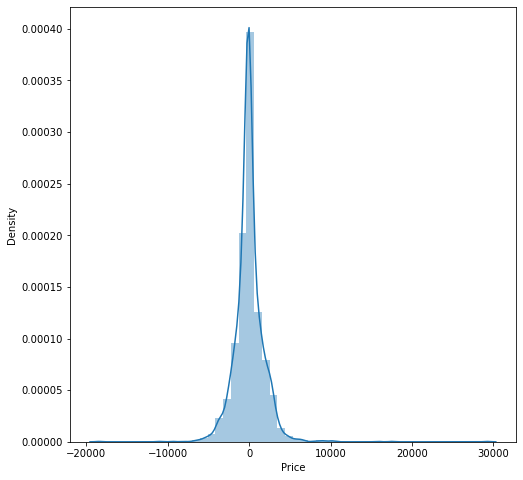

In [166]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()


Now the displot seems better.

### Saving the model 

In [195]:
import pickle
file = open('flight_rf.pkl', 'wb')

pickle.dump(rf_grid, file)

In [197]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [198]:
Y_prediction = forest.predict(X_test)

In [200]:
metrics.r2_score(Y_test, Y_prediction)

0.8386784024576475